In [2]:
import gpxpy
import gpxpy.gpx
# https://pypi.org/project/gpxpy/
# or example, GPX 1.0 specified a speed attribute for every track point, but that was removed in GPX 1.1. If you parse GPX 1.0 and serialize back with gpx.to_xml() everything will work fine. But if you have a GPX 1.1 object, changes in the speed attribute will be lost after gpx.to_xml(). If you want to force using 1.0, you can gpx.to_xml(version="1.0"). Another possibility is to use extensions to save the speed in GPX 1.1.

### read gpx

In [3]:
# read gpx file (ground truth)
gpx_file = open('2022-12-15 18 06 38.gpx', 'r')
# gwin  FE82
# pixel FDE0

gpx_file = open('2022-12-15 18 01 00.gpx', 'r')
# gwin  FDE9
# pixel FDF1

gpx = gpxpy.parse(gpx_file)
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print(f"{point.latitude}, {point.longitude}, {point.elevation}, {point.speed}")


22.341051, 114.201136, 8.453766, None
22.340955, 114.201227, 9.091217, None
22.340856, 114.201215, 7.489136, None
22.340729, 114.201365, 8.542267, None
22.34067, 114.201442, 7.552917, None
22.340629, 114.201538, 7.476501, None
22.340361, 114.201666, 9.027435, None
22.340269, 114.201691, 9.319244, None
22.340238, 114.201794, 9.330933, None
22.340224, 114.201892, 9.701477, None
22.340192, 114.201987, 9.850098, None
22.340176, 114.202096, 10.978027, None
22.340121, 114.202197, 11.525848, None
22.340058, 114.202277, 10.965759, None
22.339989, 114.202616, 12.824307, None
22.33991, 114.20267, 11.805785, None
22.33982, 114.202704, 11.175041, None
22.33972, 114.202705, 10.78537, None
22.339629, 114.20267, 10.166452, None
22.339573, 114.202758, 10.683857, None
22.33951, 114.202833, 10.87165, None
22.339421, 114.202875, 11.005887, None
22.339381, 114.202966, 10.899011, None
22.339345, 114.203067, 10.893601, None
22.339275, 114.202998, 11.192216, None
22.339222, 114.203081, 11.493819, None
22.339

### raw data

In [4]:
import pandas as pd
# pixel -------------------------
pixel = pd.read_csv('pixel_2022-12-15_lora.csv')
print(pixel)
router_info = {
    '20080029c69feeb': {'lat': 22.3482, 'lon': 114.1955, 'name': '五芳街 沙田坳'},
    '20180029c69feeb': {'lat': 22.3482, 'lon': 114.1955, 'name': '五芳街 沙田坳'},
    '20080029c1e38f3': {'lat': 22.33859, 'lon': 114.19964, 'name': '五芳街'},
    '20080029c5e3677': {'lat': 22.34135, 'lon': 114.20243, 'name': 'Diamond Hill'},
    # '20180029c4574b6': {'lat': -1, 'lon': -1, 'name': '畢架山'},
    # '20080029c4574b6': {'lat': -1, 'lon': -1, 'name': '畢架山'},
    # '20080029c1ea300': {'lat': -1, 'lon': -1, 'name': 'Kowloon Bay'},
    '2005813d31be7ec': {'lat': 22.33668, 'lon': 114.19884, 'name': '八達街'},
    '20180029c7b7b60': {'lat': 22.32514, 'lon': 114.21082, 'name': 'Kowloon Bay(Metro Center 2)'},
    '20080029c69ffc2': {'lat': 22.31499, 'lon': 114.18307, 'name': '何文田邨適文樓'},
}

# gwin -------------------------
gwin = pd.read_csv('emsd_1215.csv')
print(gwin)

                         tag          gateway  rssi            ts
0    AC-1F-09-FF-FE-08-FD-F1  20080029c5e3677  -108  1.671085e+09
1    AC-1F-09-FF-FE-08-FD-F1  20080029c5e3677  -114  1.671085e+09
2    AC-1F-09-FF-FE-08-FD-F1  20080029c5e3677  -113  1.671085e+09
3    AC-1F-09-FF-FE-08-FD-F1  20080029c5e3677  -107  1.671085e+09
4    AC-1F-09-FF-FE-08-FD-F1  20080029c5e3677  -113  1.671085e+09
..                       ...              ...   ...           ...
843  AC-1F-09-FF-FE-08-FD-E9  2011c497bd1fcc1  -106  1.671098e+09
844  AC-1F-09-FF-FE-08-FD-E9  20080029c1ea300   -95  1.671098e+09
845  AC-1F-09-FF-FE-08-FD-E9  2001c497bd1fcc1  -105  1.671098e+09
846  AC-1F-09-FF-FE-08-FD-E9  20080029c1ea300   -96  1.671098e+09
847  AC-1F-09-FF-FE-08-FD-F1  20080029c1ea300   -79  1.671098e+09

[848 rows x 4 columns]
            gateway           tag   rssi   latitude   longitude  \
0      ZH/a//4Af7A=  RAK4630-FDE9    -87  22.338210  114.196980   
1      ZH/a//4Af7A=  RAK4630-FDE9    -87  22.33821

## TOOLS

In [5]:
import csv
import json
f = open('emsd_1215.csv', 'a', newline='', )
f_csv = csv.writer(f)
data = open('emsd_1215.txt', 'r')

In [6]:
for line in data:
    line = json.loads(line)
    # print(line)
    try:
        gateways = line['rxInfo']
        ts = line['publishedAt']
    
        for item in gateways:
            # print(item['location']) 
            raw_data = [item['gatewayID'], line['deviceName'], item['rssi'], item['location']['latitude'], item['location']['longitude'], ts]
            f_csv.writerow(raw_data)
            print(raw_data)
    except:
        pass

['ZH/a//4Af7A=', 'RAK4630-FDE9', -87, 22.33821, 114.19698, '2022-12-14T10:41:20.687412278Z']
['ZH/a//4Af7A=', 'RAK4630-FDE9', -87, 22.33821, 114.19698, '2022-12-14T10:41:20.690646332Z']
['ZH/a//4Aapw=', 'RAK4630-FDE9', -103, 22.34299, 114.19675, '2022-12-14T10:41:28.185523994Z']
['ZH/a//4Aap8=', 'RAK4630-FDE9', -101, 0, 0, '2022-12-14T10:41:28.185523994Z']
['y01BuvE4WuY=', 'RAK4630-FDE9', -101, 22.3625704, 114.119536, '2022-12-14T10:41:35.620885499Z']
['ZH/a//4Aap8=', 'RAK4630-FDE9', -113, 0, 0, '2022-12-14T10:41:35.620885499Z']
['cnb/AC4HAWY=', 'RAK4630-FDE9', -116, 22.3707136, 114.11456, '2022-12-14T10:41:35.620885499Z']
['ZH/a//4Ax58=', 'RAK4630-FDE9', -121, 22.34953, 114.17015, '2022-12-14T10:41:35.620885499Z']
['ZH/a//4Aapw=', 'RAK4630-FDE9', -105, 22.34299, 114.19675, '2022-12-14T10:41:35.620885499Z']
['ZH/a//4Aap8=', 'RAK4630-FDE9', -109, 0, 0, '2022-12-14T10:41:43.123040699Z']
['y01BuvE4WuY=', 'RAK4630-FDE9', -85, 22.3625704, 114.119536, '2022-12-14T10:41:43.123040699Z']
['ZH/a

In [7]:
from datetime import datetime as dt
import numpy as np

gt_points = np.array([(point.time.timestamp(), point.longitude, point.latitude) for track in gpx.tracks for segment in track.segments for point in segment.points if point.longitude and point.latitude])
pixel['lon'] = pixel['gateway'].map({k: v['lon'] for k, v in router_info.items()})
pixel['lat'] = pixel['gateway'].map({k: v['lat'] for k, v in router_info.items()})
pixel_data = pixel[~pixel.lat.isna() & ~pixel.lon.isna()][['rssi', 'ts', 'lon', 'lat']] # only cds and pdk
pixel_data = pixel_data[(pixel_data.ts > gt_points[0, 0]) & (pixel_data.ts < gt_points[-1, 0])]
gwin.rename(columns={' rssi':'rssi', ' longitude': 'lon', ' latitude': 'lat'}, inplace=True)
gwin['ts'] = gwin[' ts'].apply(lambda s: dt.strptime(s[:-4], '%Y-%m-%dT%H:%M:%S.%f').timestamp()+28800)
gwin_data = gwin[~(gwin.lat==0) & ~(gwin.lon==0)][['rssi', 'ts', 'lon', 'lat']]
gwin_data = gwin_data[(gwin_data.ts > gt_points[0, 0]) & (gwin_data.ts < gt_points[-1, 0])]
gwin_data

,rssi,ts,lon,lat
4449,-95,1.671094e+09,114.119536,22.362570
4450,-108,1.671094e+09,114.205660,22.342800
4452,-99,1.671094e+09,114.119536,22.362570
4454,-104,1.671094e+09,114.196950,22.342540
4456,-119,1.671094e+09,114.219650,22.357020
...,...,...,...,...
10980,-112,1.671098e+09,114.119575,22.362584
10981,-112,1.671098e+09,114.119575,22.362584
10982,-117,1.671098e+09,114.219680,22.357010
10983,-109,1.671098e+09,114.180096,22.318285


In [8]:
from bisect import bisect_right as bisect
def dist_geo(lon1, lat1, lon2, lat2):
    lon1 = np.radians(lon1); lat1 = np.radians(lat1); lon2 = np.radians(lon2); lat2 = np.radians(lat2); 
    return 2 * 6371_000 * np.arcsin(np.sqrt(np.sin((lat1-lat2)/2)**2 + np.sin((lon1-lon2)/2)**2 * np.cos(lat1)*np.cos(lat2)))
def gt_pos(t):
    idx = bisect(gt_points.T[0], t)
    if gt_points[idx, 0] == t:
        return gt_points[idx, 1:]
    last = gt_points[idx-1]; next = gt_points[idx]
    ratio = (t-last[0]) / (next[0] - last[0])
    return pd.Series(last[1:] + ratio * (next[1:] - last[1:]))
pixel_data[['gt_lon', 'gt_lat']] = pixel_data.ts.apply(gt_pos)
pixel_data['dist'] = dist_geo(pixel_data.gt_lon, pixel_data.gt_lat, pixel_data.lon, pixel_data.lat)
gwin_data[['gt_lon', 'gt_lat']] = gwin_data.ts.apply(gt_pos)
gwin_data['dist'] = dist_geo(gwin_data.gt_lon, gwin_data.gt_lat, gwin_data.lon, gwin_data.lat)



C:\Users\Tianrui Jiang\AppData\Local\Temp\ipykernel_3556\227644211.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


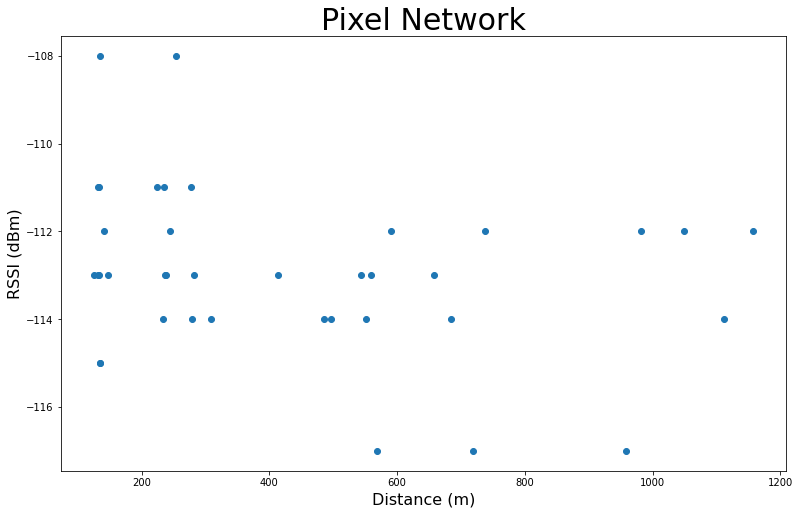

In [9]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.scatter(pixel_data.dist, pixel_data.rssi)
ax.set_xlabel('Distance (m)', size=16)
ax.set_ylabel('RSSI (dBm)', size=16)
ax.set_title('Pixel Network', size=30)
fig.show()

standard error: 7.038825365536841
RSSI range: 39
std of RSSI: 7.435940635339224


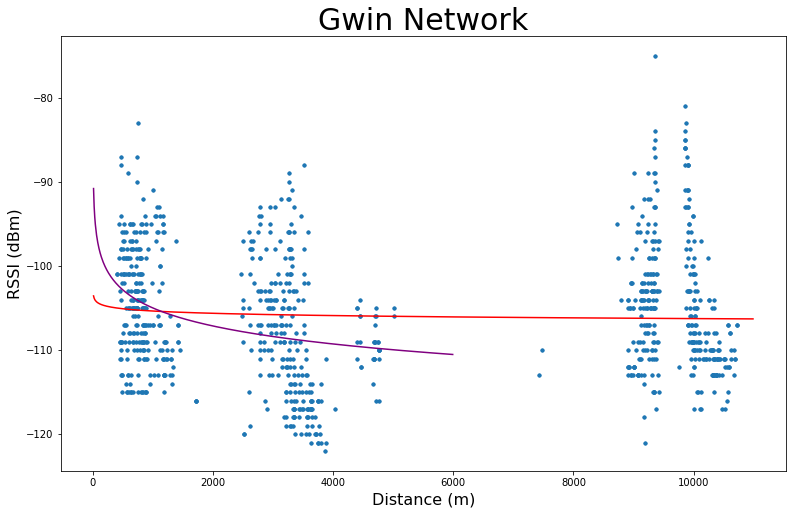

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))
ax.scatter(gwin_data.dist, gwin_data.rssi, marker='.')
ax.set_xlabel('Distance (m)', size=16)
ax.set_ylabel('RSSI (dBm)', size=16)
ax.set_title('Gwin Network', size=30)
ax.plot(np.arange(10, 11000, 10), np.polyval(np.polyfit(np.log(gwin_data.dist), gwin_data.rssi, 1), np.log(np.arange(10, 11000, 10))), color='red')
near = gwin_data.dist < 6000
ax.plot(np.arange(10, 6000, 10), np.polyval(np.polyfit(np.log(gwin_data.dist[near]), gwin_data.rssi[near], 1), np.log(np.arange(10, 6000, 10))), color='purple')
# fig.show()
print(f'standard error: {np.sqrt(((gwin_data.rssi[near] - np.polyval(np.polyfit(np.log(gwin_data.dist[near]), gwin_data.rssi[near], 1), np.log(gwin_data.dist[near])))**2).mean())}')

In [ ]:
print(dt.strftime(dt.fromtimestamp(gt_points[0,0]), '%H:%M:%S.%f'))
print(dt.strftime(dt.fromtimestamp(gt_points[-1,0]), '%H:%M:%S.%f'))

16:51:39.000000
18:00:48.000000


In [ ]:
(pixel_data.ts.values[-1] - pixel_data.ts.values[0])/pixel_data.shape[0]

45.19140384699169

In [ ]:
print(pixel.tag.unique())
print(pixel.gateway.unique())
print(gwin[' tag'].unique())
print(gwin['gateway'].unique())

['AC-1F-09-FF-FE-08-FD-F1' 'AC-1F-09-FF-FE-08-FD-E0'
 'AC-1F-09-FF-FE-08-FD-E9']
['20080029c5e3677' '20080029c45752f' '20080029c1ea300' '2001c497bd1fcc1'
 '2005813d31be7ec' '2011c497bd1fcc1' '2015813d349f6cc' '20080029c1e38f0']
['RAK4630-FDE9' 'RAK4630-FE82']
['ZH/a//4Af7A=' 'ZH/a//4Aapw=' 'ZH/a//4Aap8=' 'y01BuvE4WuY='
 'cnb/AC4HAWY=' 'ZH/a//4Ax58=' 'cnb/AC4IA/g=' 'ZH/a//4Ax50='
 'rB8J//4GUl0=' 'cnb/AC4HAhU=' 'cnb/AC4GKw0=' 'AIAAAKAAccc='
 'ZH/a//4Aass=' 'ZH/a//4Aaqg=' 'rB8J//4HAaA=' 'ZH/a//4Ab1A='
 'ZH/a//4Af74=' 'ZH/a//4Af4Y=' 'cHb/AFQIAEo=' 'cnb/AC4IA/0='
 'cnb/AC4GLJE=' 'cNN5//6OCQA=' 'ZH/a//4Af4A=' 'AIAAAKAAWs0='
 'AIAAAKAAWtE=' 'cnb/AC4IBBE=' 'cnb/AC4IA/s=' 'Q/NT5NJboFU='
 'Dr7+WcPZkeo=' 'cNN5//6OCKg=' 'dKyHkOpmIg8=' '9oM/P/6EQcI='
 'cNN5//6OCYg=' 'AIAAAKAAeUU=' 'ZH/a//4Av6s=' 'rB8J//4GUmk='
 'ZH/a//4Ab10=' 'cHb/AFQIANs=' 'AIAAAKAAnj0=' 'cHb/AFQIAM8=']
